# 서포트 벡터머신_연습

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import scale
matplotlib.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.svm import SVC

#sklearn.ensemble 의 Random.ForestClassifier: 분류랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# 파일명만 적을 수 있도록
from os import chdir
chdir("/home/pirl/test/실습파일")
os.getcwd()

'/home/pirl/test/실습파일'

In [4]:
ds_hmeq = pd.read_csv("HMEQ.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
ds_hmeq["JOB"].fillna("Other",inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(),inplace=True)

In [6]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
np.random.seed(seed = 1234)
# 0.7(70%)보다 작으면 True -> train 데이터, 아니면 False -> test데이터
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
# print(msk) 확인용
ds_hmeq_test = ds_hmeq_dummy[~msk]
# train/test 데이터의 목표변수 설명변수 지정
ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1, inplace = False)
# train 데이터와 test 데이터의 크기
print("train data X size: {}".format(ds_hmeq_train_x.shape))
print("train data Y size: {}".format(ds_hmeq_train_y.shape))
print("test data X size: {}".format(ds_hmeq_test_x.shape))
print("test data Y size: {}".format(ds_hmeq_test_y.shape))

train data X size: (2604, 18)
train data Y size: (2604,)
test data X size: (1144, 18)
test data Y size: (1144,)


In [8]:
# SVC 모델 생성: SVC
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)
# 훈련 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(ds_hmeq_train_x,ds_hmeq_train_y)))
# 테스트 데이터 셋 정확동
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(ds_hmeq_test_x,ds_hmeq_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.910


In [9]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

## - C: 규제에 대한 강도 변경

In [17]:
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
Para_C = []
# C를 0.1부터 1까지 0.1단위로 조정
for C in range(10):
    svm1 = SVC(C = (C+1)/10,random_state=1234)
    svm1.fit(ds_hmeq_train_x,ds_hmeq_train_y)
    Para_C.append((C+1)/10)
    train_accuracy.append(svm1.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(svm1.score(ds_hmeq_test_x,ds_hmeq_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["C"] = Para_C
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
ds_accuracy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.907,0.91
1,0.2,0.907,0.91
2,0.3,0.907,0.91
3,0.4,0.907,0.91
4,0.5,0.907,0.91
5,0.6,0.907,0.91
6,0.7,0.907,0.91
7,0.8,0.907,0.91
8,0.9,0.907,0.91
9,1.0,1.000,0.91


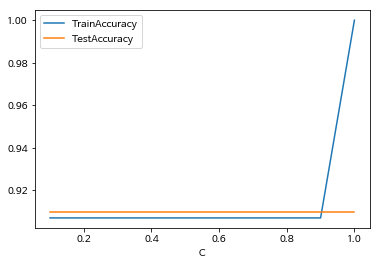

In [14]:
# C별 정확도 그래프로 확인
ds_accuracy1.set_index("C", inplace = False).plot.line()

## - Gamma: 훈련 샘플이미치는 영향의 범위를 변경

In [16]:
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
para_gamma = []
# Gamma를 0.1부터 1까지 0.1단위로 조정
for gamma in range(1,10):
    svm2 = SVC(gamma = gamma/10,random_state=1234)
    svm2.fit(ds_hmeq_train_x,ds_hmeq_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(svm2.score(ds_hmeq_test_x,ds_hmeq_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Gamma"] = para_gamma
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.91
1,0.2,1.0,0.91
2,0.3,1.0,0.91
3,0.4,1.0,0.91
4,0.5,1.0,0.91
5,0.6,1.0,0.91
6,0.7,1.0,0.91
7,0.8,1.0,0.91
8,0.9,1.0,0.91


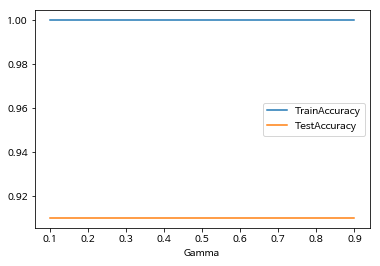

In [19]:
ds_accuracy2.set_index("Gamma", inplace = False).plot.line()

## Scale 조절 후 SVC 모델 재실행
## - scale: 설명변수 값의 구간을 동일하게 변경

In [20]:
# train 데이터셋 스케일 조정
ds_hmeq_train_x_scaled = scale(ds_hmeq_train_x, axis=0)
# test 데이터셋 스케일 조정
ds_hmeq_test_x_scaled = scale(ds_hmeq_test_x, axis=0)
# 스케일이 변경된 X변수 확인
pd.DataFrame(ds_hmeq_train_x_scaled,columns=ds_hmeq_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


## - scale이 조정된 ds_hmeq_train_x_scaled 데이터로 새로운 모델 생성

In [21]:
# 새로운 SVC 모형 생성
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
# 훈련 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y)))
# 테스트 데이터 셋 정확동
print("Accuracy on test set: {:.3f}".format(svm_uncustomized_scaled.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y)))

Accuracy on training set: 0.941
Accuracy on test set: 0.934


## 새로운 SVC모델 Paramter 변경
## - C: 규제에 대한 강도 변경

In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
Para_C = []
# C를 1부터 15까지 1단위로 조정
for C in range(15):
    svm1_scaled = SVC(C = C+1,random_state=1234)
    svm1_scaled.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
    Para_C.append(C+1)
    train_accuracy.append(svm1_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(svm1_scaled.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy1_scaled = pd.DataFrame()
ds_accuracy1_scaled["C"] = Para_C
ds_accuracy1_scaled["TrainAccuracy"] = train_accuracy
ds_accuracy1_scaled["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
ds_accuracy1_scaled.round(3)

,C,TrainAccuracy,TestAccuracy
0,1,0.941,0.934
1,2,0.954,0.942
2,3,0.963,0.945
3,4,0.965,0.951
4,5,0.968,0.950
5,6,0.969,0.952
6,7,0.970,0.953
7,8,0.971,0.955
8,9,0.971,0.955
9,10,0.974,0.955


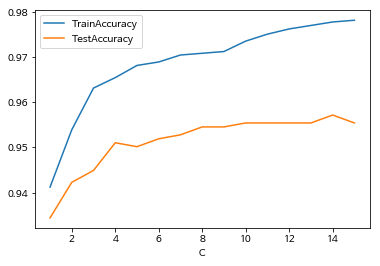

In [23]:
ds_accuracy1_scaled.set_index("C", inplace=False).plot.line()

## - Gamma: 훈련 샘플이미치는 영향의 범위를 변경

In [24]:
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
para_gamma = []
# Gamma를 0.1부터 1까지 0.1단위로 조정
for gamma in range(1,10):
    svm2_scaled = SVC(gamma = gamma/10,random_state=1234)
    svm2_scaled.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2_scaled.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(svm2_scaled.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy2_scaled = pd.DataFrame()
ds_accuracy2_scaled["Gamma"] = para_gamma
ds_accuracy2_scaled["TrainAccuracy"] = train_accuracy
ds_accuracy2_scaled["TestAccuracy"] = test_accuracy
ds_accuracy2_scaled.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.957,0.941
1,0.2,0.970,0.931
2,0.3,0.978,0.922
3,0.4,0.981,0.920
4,0.5,0.985,0.920
5,0.6,0.987,0.920
6,0.7,0.989,0.920
7,0.8,0.991,0.919
8,0.9,0.992,0.919


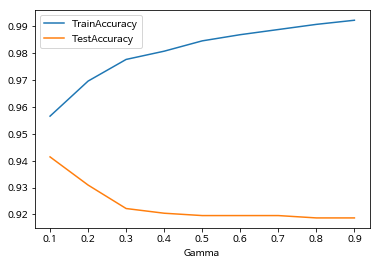

In [25]:
ds_accuracy2_scaled.set_index("Gamma", inplace = False).plot.line()

# 서포트 벡터머신_실습

In [26]:
ds_churn = pd.read_csv("통신고객이탈.csv")
ds_churn["CHURN"].replace(to_replace = "Active", value = 0, inplace = True)
ds_churn["CHURN"].replace(to_replace = "Churned", value = 1, inplace = True)
ds_churn = ds_churn.drop("CUSTOMER_ID", axis = 1)
ds_churn_dummy = pd.get_dummies(ds_churn)
ds_churn_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
np.random.seed(seed = 1234)
# 0.7(70%)보다 작으면 True -> train 데이터, 아니면 False -> test데이터
msk = np.random.rand(ds_churn_dummy.shape[0]) < 0.7
ds_churn_train = ds_churn_dummy[msk]
#print(msk)
ds_churn_test = ds_churn_dummy[~msk]
# train/test 데이터의 목표변수 설명변수 지정
ds_churn_train_y = ds_churn_train["CHURN"]
ds_churn_train_x = ds_churn_train.drop("CHURN", axis = 1, inplace = False)
ds_churn_test_y = ds_churn_test["CHURN"]
ds_churn_test_x = ds_churn_test.drop("CHURN", axis = 1, inplace = False)
# train 데이터와 test 데이터의 크기
print("train data X size: {}".format(ds_churn_train_x.shape))
print("train data Y size: {}".format(ds_churn_train_y.shape))
print("test data X size: {}".format(ds_churn_test_x.shape))
print("test data Y size: {}".format(ds_churn_test_y.shape))

train data X size: (635, 33)
train data Y size: (635,)
test data X size: (295, 33)
test data Y size: (295,)


In [29]:
# SVC 모델 생성: SVC
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(ds_churn_train_x, ds_churn_train_y)
# 훈련 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(ds_churn_train_x,ds_churn_train_y)))
# 테스트 데이터 셋 정확동
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(ds_churn_test_x,ds_churn_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.803


## - C: 규제에 대한 강도 변경

In [30]:
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
Para_C = []
# C를 0.1부터 1까지 0.1단위로 조정
for C in range(10):
    svm1 = SVC(C = (C+1)/10,random_state=1234)
    svm1.fit(ds_churn_train_x,ds_churn_train_y)
    Para_C.append((C+1)/10)
    train_accuracy.append(svm1.score(ds_churn_train_x,ds_churn_train_y))
    test_accuracy.append(svm1.score(ds_churn_test_x,ds_churn_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["C"] = Para_C
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
ds_accuracy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.808,0.803
1,0.2,0.808,0.803
2,0.3,0.808,0.803
3,0.4,0.808,0.803
4,0.5,0.808,0.803
5,0.6,0.808,0.803
6,0.7,0.808,0.803
7,0.8,0.808,0.803
8,0.9,1.000,0.803
9,1.0,1.000,0.803


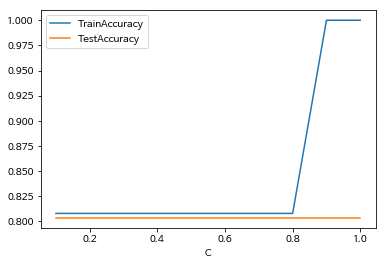

In [31]:
# C별 정확도 그래프로 확인
ds_accuracy1.set_index("C", inplace = False).plot.line()

In [32]:
# work in process